In [ ]:
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d mahoora00135/flights


Dataset URL: https://www.kaggle.com/datasets/mahoora00135/flights
License(s): CC0-1.0
 49% 5.00M/10.3M [00:00<00:00, 41.1MB/s]
100% 10.3M/10.3M [00:00<00:00, 54.8MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("flights.zip", "r") as zip_ref:
    zip_ref.extractall("flights_data")


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium  # Para criar mapas de calor

df = pd.read_csv("flights_data/flights.csv")
df.head()



,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


### Este dataset fornece dados sobre voos, incluindo atrasos, horários de partida e chegada, aeroportos e companhias aéreas. Ele permite analisar padrões e identificar fatores que influenciam os atrasos, como distância e companhia aérea, sendo útil para entender e prever a pontualidade de voos.


In [ ]:
#

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

id: Identificador único de cada entrada de voo. (Qualitativa)

year: Ano em que o voo ocorreu. (Quantitativa)

month: Mês do voo. (Quantitativa)

day: Dia do voo. (Quantitativa)

dep_time: Horário real de partida do voo. (Quantitativa)

sched_dep_time: Horário programado de partida. (Quantitativa)

dep_delay: Atraso na partida em minutos. (Quantitativa)

arr_time: Horário real de chegada. (Quantitativa)

sched_arr_time: Horário programado de chegada. (Quantitativa)

arr_delay: Atraso na chegada em minutos. (Quantitativa)

carrier: Código da companhia aérea. (Qualitativa)

flight: Número do voo. (Qualitativa)

tailnum: Identificação da aeronave. (Qualitativa)

origin: Aeroporto de origem. (Qualitativa)

dest: Aeroporto de destino. (Qualitativa)

air_time: Duração do voo em minutos. (Quantitativa)

distance: Distância entre aeroportos de origem e destino. (Quantitativa)

hour: Hora programada de partida. (Quantitativa)

minute: Minuto programado de partida. (Quantitativa)

time_hour: Data e hora completas do voo. (Qualitativa/Temporal)

name: Nome associado ao voo ou companhia. (Qualitativa)



---

# **Qualitativas:**
id/
carrier/
flight/
tailnum/
origin/
dest/
name/
time_hour


---


# **Quantitativas:**
year/
month/
day/
dep_time/
sched_dep_time/
dep_delay/
arr_time/
sched_arr_time/
arr_delay/
air_time/
distance/
hour/
minute


A **correlação de Pearson** é uma medida estatística que nos ajuda a entender se duas variáveis numéricas estão relacionadas e de que forma.

-1: Correlação negativa perfeita (uma aumenta, a outra diminui).

0: Não há relação linear.

1: Correlação positiva perfeita (ambas aumentam ou diminuem juntas).

In [ ]:
descricao = df.describe()
print(descricao)

                  id      year          month            day       dep_time  \
count  336776.000000  336776.0  336776.000000  336776.000000  328521.000000   
mean   168387.500000    2013.0       6.548510      15.710787    1349.109947   
std     97219.001466       0.0       3.414457       8.768607     488.281791   
min         0.000000    2013.0       1.000000       1.000000       1.000000   
25%     84193.750000    2013.0       4.000000       8.000000     907.000000   
50%    168387.500000    2013.0       7.000000      16.000000    1401.000000   
75%    252581.250000    2013.0      10.000000      23.000000    1744.000000   
max    336775.000000    2013.0      12.000000      31.000000    2400.000000   

       sched_dep_time      dep_delay       arr_time  sched_arr_time  \
count   336776.000000  328521.000000  328063.000000   336776.000000   
mean      1344.254840      12.639070    1502.054999     1536.380220   
std        467.335756      40.210061     533.264132      497.457142   
min 

In [ ]:
#tirando algumas informações irrelevantes para essa análise e abreviando nomes extensos
df = df.drop(['id', 'year','month','day','sched_dep_time','sched_arr_time','hour','minute'], axis=1)
df.head()

,dep_time,dep_delay,arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,time_hour,name
0,517.0,2.0,830.0,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,2013-01-01 05:00:00,United Air Lines Inc.
1,533.0,4.0,850.0,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,2013-01-01 05:00:00,United Air Lines Inc.
2,542.0,2.0,923.0,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,2013-01-01 05:00:00,American Airlines Inc.
3,544.0,-1.0,1004.0,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,2013-01-01 05:00:00,JetBlue Airways
4,554.0,-6.0,812.0,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,2013-01-01 06:00:00,Delta Air Lines Inc.


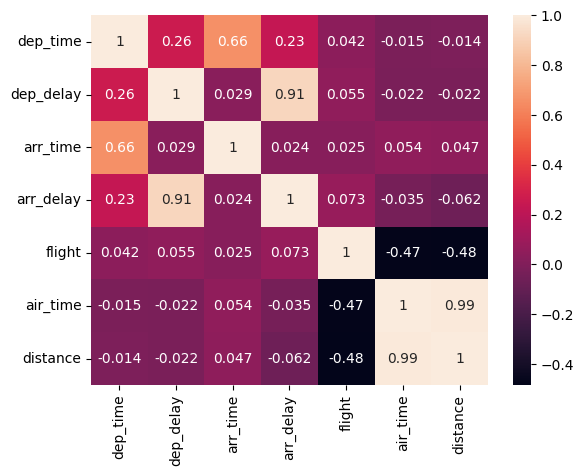

In [ ]:
def zip_corr(df):
  """
  Calculate and plot the correlation matrix for numeric columns in the dataframe.
  """
  # Select only numeric features for correlation analysis
  numeric_df = df.select_dtypes(include=['number'])
  corr_matrix = numeric_df.corr()
  sns.heatmap(corr_matrix, annot=True)

# Call the function with the dataframe 'df'
zip_corr(df)

Ao análisar o gráfico vemos que dep_delay(Atraso na partida) e arr_delay(Atraso na chegada) estão com uma correlação muito forte(positiva), quando um voo sai atrasado, é quase certo que ele também chegará atrasado. Isso é um padrão comum em viagens aéreas e pode ser influenciado por diversos fatores, como condições climáticas, problemas mecânicos, controle de tráfego aéreo, etc



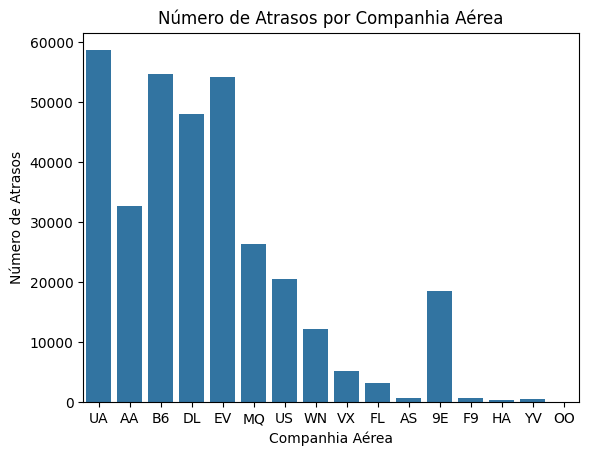

In [ ]:
# Mostrando a companhia Aérea com mais atrasos
import seaborn as sns

sns.countplot(x='carrier', data=df)
plt.title('Número de Atrasos por Companhia Aérea')
plt.xlabel('Companhia Aérea')
plt.ylabel('Número de Atrasos')
plt.show()

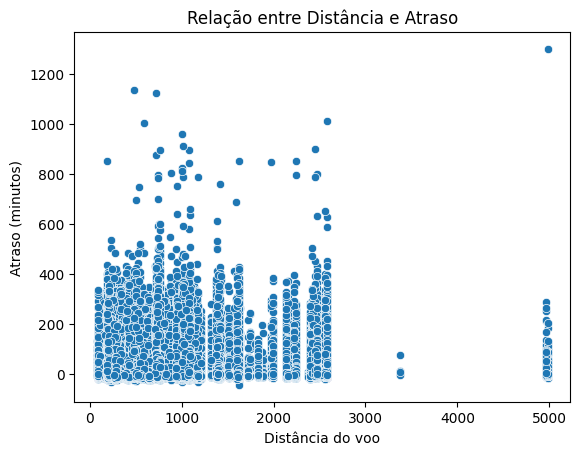

In [ ]:
# relação entre a distância do voo e o atraso.
sns.scatterplot(x='distance', y='dep_delay', data=df)
plt.xlabel('Distância do voo')
plt.ylabel('Atraso (minutos)')
plt.title('Relação entre Distância e Atraso')
plt.show()

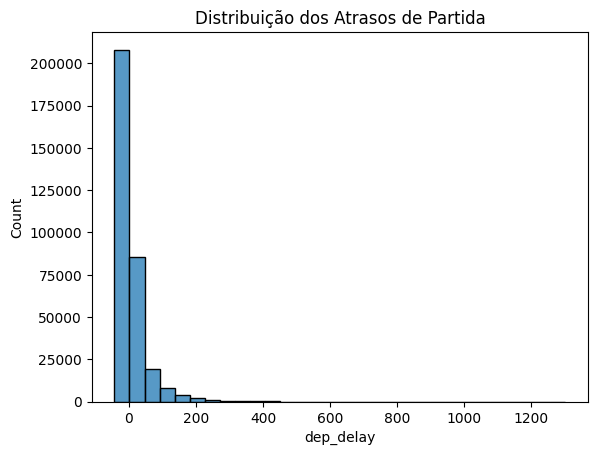

In [ ]:
sns.histplot(data=df, x='dep_delay', bins=30)
plt.title('Distribuição dos Atrasos de Partida')
plt.show()